# Part A CA1: Classification
Name: Rachel Tan Min Zhi <br>
Class: DAAA/FT/2A/03 <br>
Admission No.: p2011802

**Prediction Task**: Predict the class of a mushroom: edible or poisonous. <br>
The output variable is the predicted class of a mushroom. By comparing it to the actual class of the mushroom, it can determine how well the model has performed.

### **Table of Contents**
1. Load Libraries and Dataset
2. EDA
3. Feature Selection
4. Model Training
5. Model Evaluation (Interim)
6. Model Improvment<br>
    a. Cross Validation<br>
    b. Hyperparameter Tuning<br>
7. Model Evaluation (After tuning models)
8. Feature Importance of certain classifiers
9. Conclusion

# Load Libraries

In [162]:
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & feature engineering
from sklearn.feature_selection import chi2

# Train test split, Cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

# Evaluate model's performance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, roc_curve

import joblib
import pickle

# Load Dataset
I retrieved the column names are from the agaricus-lepiota.names file.

In [163]:
columns = pd.Series(['class','cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 
                     'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
                     'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 
                     'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])
columns

0                        class
1                    cap-shape
2                  cap-surface
3                    cap-color
4                      bruises
5                         odor
6              gill-attachment
7                 gill-spacing
8                    gill-size
9                   gill-color
10                 stalk-shape
11                  stalk-root
12    stalk-surface-above-ring
13    stalk-surface-below-ring
14      stalk-color-above-ring
15      stalk-color-below-ring
16                   veil-type
17                  veil-color
18                 ring-number
19                   ring-type
20           spore-print-color
21                  population
22                     habitat
dtype: object

I represented my data as a dataframe. The target variable is the first column, the characteristics of the mushrooms are from the second column onwards.

In [164]:
data = pd.read_csv('./dataset/agaricus-lepiota.data', names = columns)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Stored column names of all features excluding the target variable in an array. Later on in my code, I will use the this array to match values to the feature name.

In [165]:
features = data.drop('class', axis = 1).columns.values
features

array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype=object)

# EDA 

**Summary of the Mushroom Data**<br>
No. of records: 8124 <br>
No. of columns: 23 <br>

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**Descriptive Statistics about the Mushroom Data**

In [167]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


## Handling Missing Values
According to the agaricus-lepiota.names file, missing values are represented as "?" and they only exist in the "stalk-root" attribute. <br>
Hence, I replaced missing values in the "stalk-root" attribute with the most frequent value in the feature.

In [168]:
np.unique(data['stalk-root'])

array(['?', 'b', 'c', 'e', 'r'], dtype=object)

In [169]:
# get the most frequent value
mostfreqval = data['stalk-root'].mode()
# replace missing values
cleaned_data = data['stalk-root'].replace(['?'], mostfreqval)
# updated column in data
data['stalk-root'] = cleaned_data
cleaned_data

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

## Visualisations

Plotted a count plot to count the total number of poisonous and edible mushrooms.<br>
Purpose: To compare the sample size of the two types of mushrooms in this data set and determine if the classes are balanced/imbalanced.<br><br>
**Legend**<br>
e: Edible<br>
p: Poisonous

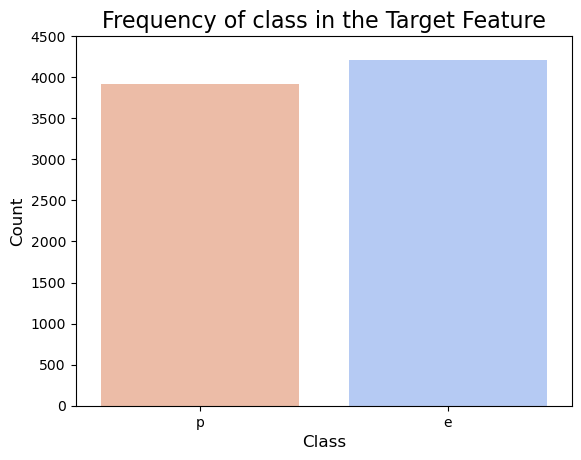

In [170]:
sns.countplot(data = data, x = 'class', palette = 'coolwarm_r')
plt.title('Frequency of class in the Target Feature', fontsize = 16)
plt.xlabel('Class', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.ylim(0, 4500)
plt.show()

**Insight**: From the countplot above the sample size of both classes are quite balanced.<br><br>

### <center>The following Count plots compare the frequency between poisonous and edible mushrooms for each characteristic in an attribute.<center>

**Legend**<br>
Orange: Poisonous<br>
Blue: Edible<br>
Note: The limits of the y-axis are not the same for all features.<br>

Purpose: To observe if certain attributes could be more important to my model in differentiating the mushrooms.<br>
An attribute has a few characteristics. For example, the cap-surface attribute has 4 different characteristics represented as a single character: s, y, f, g.<br>

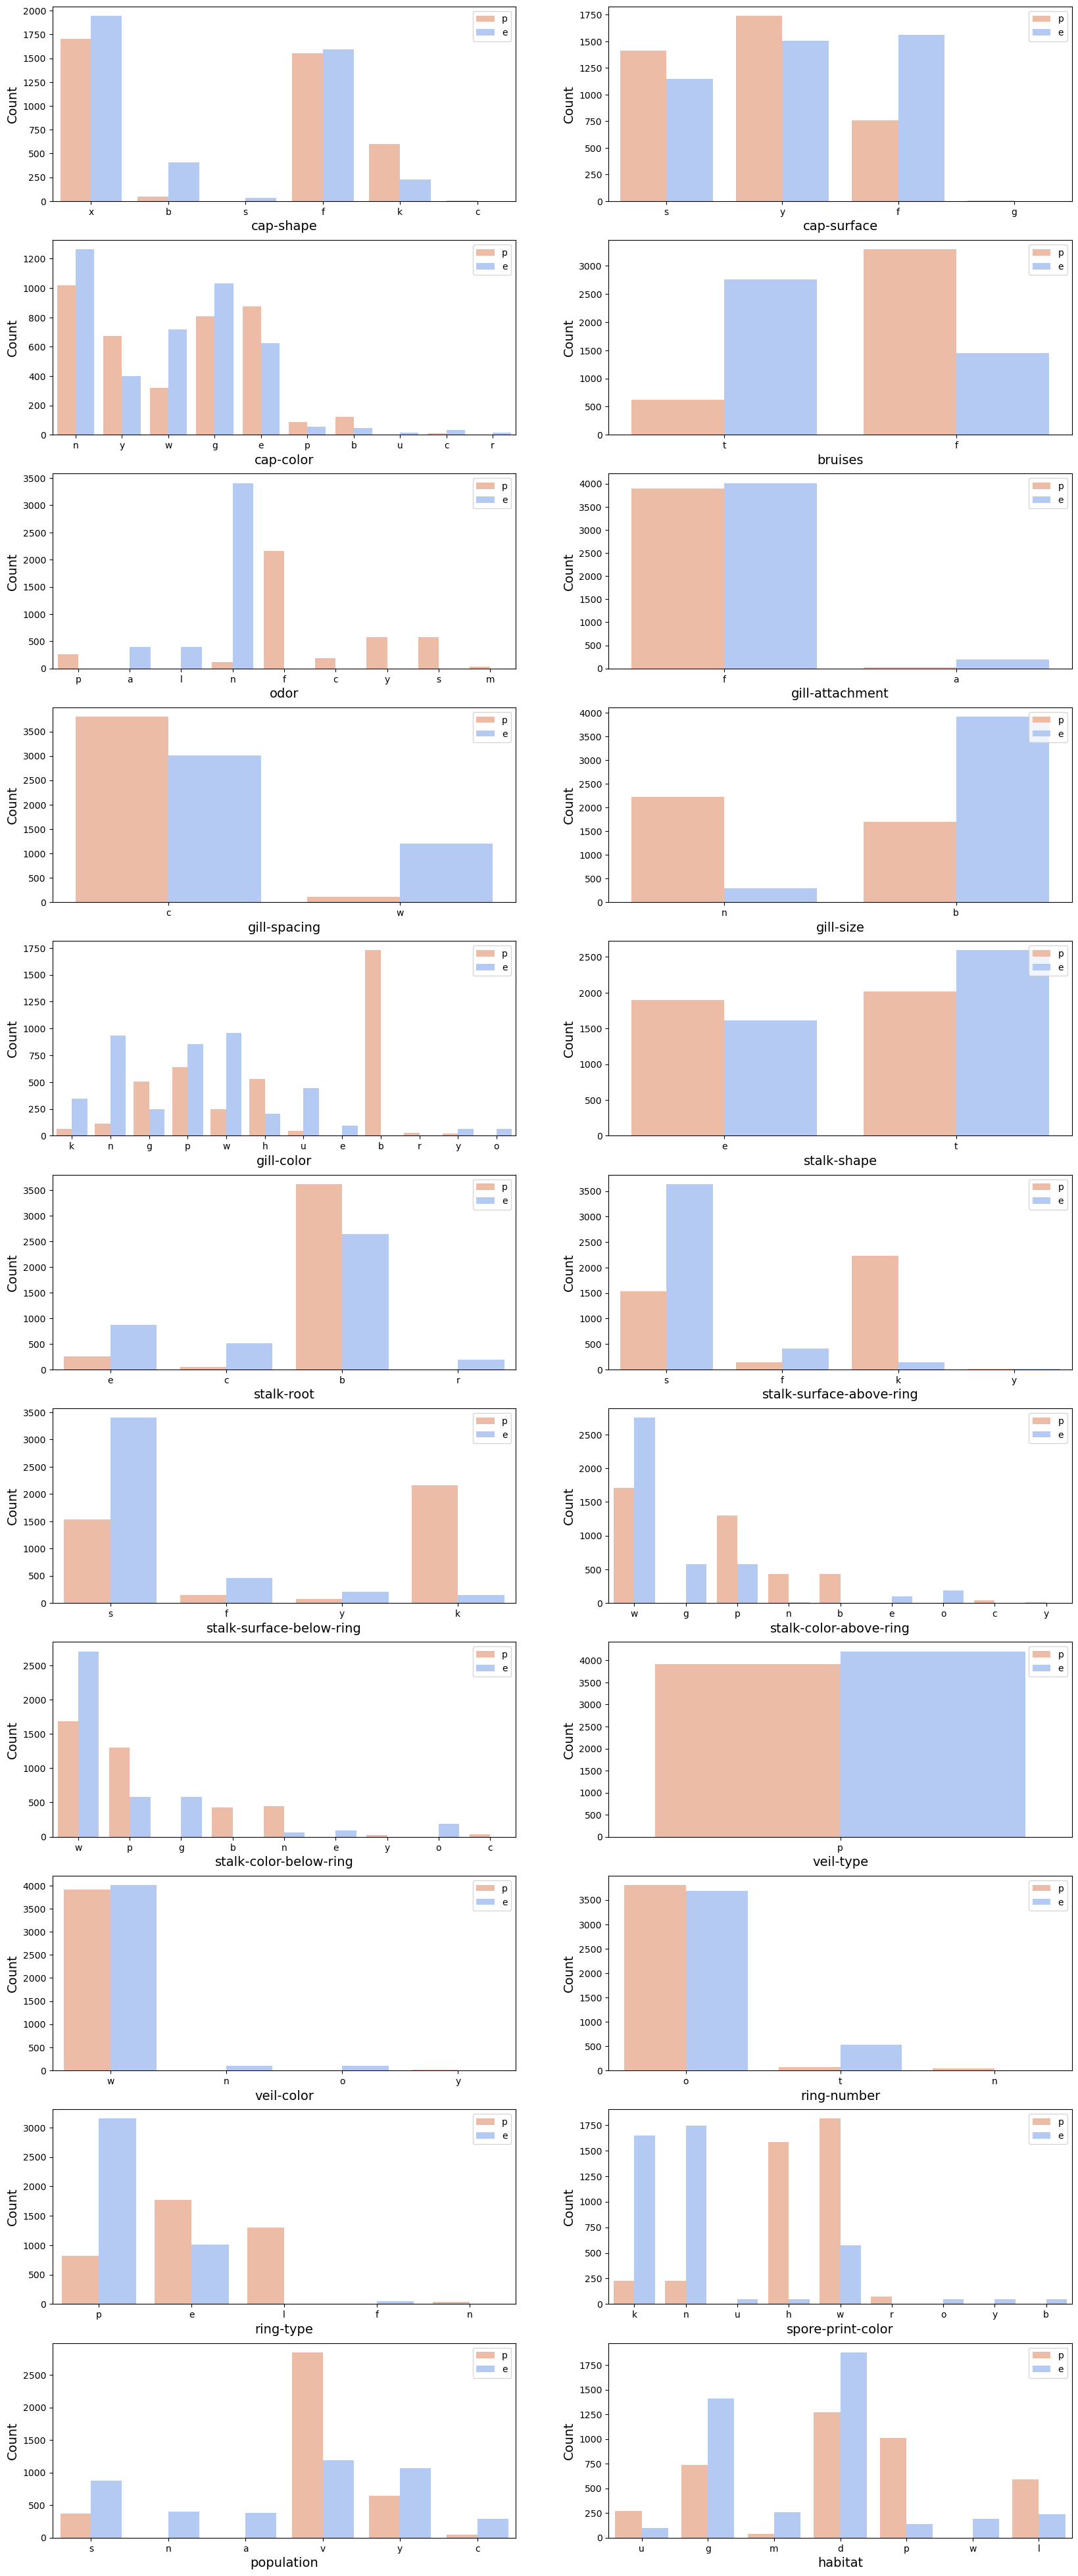

In [171]:
fig, axes = plt.subplots(11, 2, figsize=(20, 50))
for feature, ax in zip(features, axes.flatten()):
    sns.countplot(data = data, x = feature, hue = 'class', palette = 'coolwarm_r', ax = ax)
    ax.set_xlabel(feature, fontsize = 14)
    ax.set_ylabel('Count', fontsize = 14)
    ax.legend(loc = 'upper right')
plt.show()

**Insight**: From the multiple count plots above, I identified that the some attributes have a significantly larger difference in frequency between poisonous and edible mushrooms for each characteristic. Therefore, they could be important to my model in differentiating the mushrooms. These features are:
- bruises
- odor
- gill-size
- stalk-surface-above-ring
- stalk-surface-below-ring
- stalk-color-above-ring
- ring-type
- spore-print-color
- population
- habitat

## Encoding Categorical Data
Using pandas get_dummies method, I mapped the categorical values of the features into numerical values, 0 and 1.<br>
`X` variable represents the data containing the features of the mushroom.

In [172]:
X = pd.get_dummies(data[features])
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


`y` variable contains data of the target feature. <br>
0: Poisonous <br>
1: Edible <br>
I returned the row where the value 0 represents poisonous mushrooms. Hence, the positive class represents poisonous mushrooms and the negative class represents edible mushrooms.

In [173]:
y = pd.get_dummies(data['class'])['e']
y

0       0
1       1
2       1
3       0
4       1
       ..
8119    1
8120    1
8121    1
8122    0
8123    1
Name: e, Length: 8124, dtype: uint8

# Feature Selection
I calculated the chi-squared value and p-value for each feature. The purpose is to test if the counts observed from the data are different from what is expected, if there is no association between the class of the mushroom and the feature.<br>
$H_{0}$: There is no association between the class of the mushroom and the respective feature. <br>
$H_{1}$: There is an association between the class of the mushroom and the respective feature. <br>
If P-value <= 0.05, I will reject $H_{0}$ and conclude that there is very strong evidence of an association between the class of the mushroom and the respective feature.

In [174]:
fs = np.transpose(chi2(X, y))
stats_res = pd.DataFrame(fs, columns = ['Chi2', 'p-value'], index = X.columns.values, dtype = float).sort_values('Chi2', ascending = False)
stats_res

,Chi2,p-value
odor_n,2836.187954,0.000000
odor_f,2321.062308,0.000000
stalk-surface-above-ring_k,1986.408494,0.000000
stalk-surface-below-ring_k,1914.371389,0.000000
gill-color_b,1856.849847,0.000000
...,...,...
gill-attachment_f,3.505447,0.061167
cap-shape_x,3.229664,0.072316
stalk-surface-above-ring_y,2.125332,0.144881
cap-shape_f,1.706428,0.191449


I retrieved all the columns that had at least one of their characteristic with a p-value of less than or equal to 5%.

In [175]:
below_threshold = stats_res[stats_res['p-value'] <= 0.05]
feature_cols = np.unique([feature[:-2] for feature in below_threshold.index.values])
feature_cols

array(['bruises', 'cap-color', 'cap-shape', 'cap-surface',
       'gill-attachment', 'gill-color', 'gill-size', 'gill-spacing',
       'habitat', 'odor', 'population', 'ring-number', 'ring-type',
       'spore-print-color', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'stalk-root', 'stalk-shape',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'veil-color'], dtype='<U24')

Only the veil-type feature has a P-value of more than 5%. Hence, there is no association between the class of the mushroom and the veil-type.

In [176]:
# difference between the array of all features from the original data and the features with a p-value of less than 5%
above_threshold = list(set(features) - (set(feature_cols)))
above_threshold

['veil-type']

I plotted a barplot to show the top 20 characteristics that had the highest chi-squared value with relation to the class of the mushroom.<br>
Purpose: Identify features that have a strong association with the class of the mushroom.

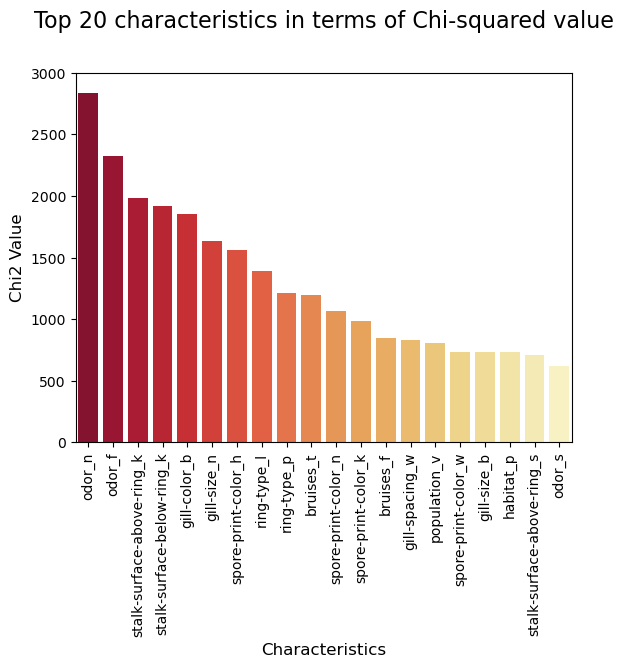

In [177]:
sns.barplot(data = stats_res.head(20), x = stats_res.head(20).index, y = 'Chi2', palette = 'YlOrRd_r')
plt.ylim(0, 3000)
plt.ylabel('Chi2 Value', size = 12)
plt.xlabel('Characteristics', size = 12)
plt.xticks(rotation = 90)
plt.title('Top 20 characteristics in terms of Chi-squared value', size = 16, y = 1.1)
plt.show()

**Insight:** Features related to odor have a strong association with the class of the mushroom.

The features I will use are all variables except the veil-type feature. With the following code, I removed the veil-type feature from the data I will use to train my model.

In [178]:
# Removed column(s) that starts with "veil-type"
X = X[[col for col in X.columns.values if col.startswith(above_threshold[0]) == False]]
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


# Model Training

I split the data into 70% train data and 30% test data.

In [179]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Baseline Model
I used Logistic Regression as a baseline model as it is a simple and efficient model to train.<br>
Purpose: To compare other classifers to the baseline model by setting a baseline for the accuracy of the classifier.

In [180]:
# define cv
cv = KFold(n_splits=5, random_state = 101, shuffle = True)

In [181]:
baseline = LogisticRegression()
cv_score = cross_val_score(baseline, X, y, cv = cv)
avg_score = np.mean(cv_score)
print(f'Baseline model accuracy score: {avg_score*100:.3f}%')

Baseline model accuracy score: 99.963%


## Initialise Algorithms
I used multiple algorithms of different advantages to decide which algorithm produces the best accuracy for this dataset.<br>
Reasons for choice of algorithms: <br>
1. **Support Vector Machine**: It maximises the distance between the classes in order to minimise the error and achieve high accuracy. Also, SVM is designed to work well in high dimensional spaces. <br>
2. **Gaussian Naïve Bayes**: It assumes independence between variables and will converge quicker than discriminative models.
3. **Decision Tree**: Trains at a high speed and its output is simpler to understand as it can be visualised using a graph.
4. **Random Forest**: A powerful and accurate algorithm to achieve a high classification accuracy. It ensembles multiple decision trees that will vote for the right prediction through bagging. Through mathematical calculations, the set of trees are not correlated, hence, it can prevent overfitting.

In [122]:
X = data.drop('class', axis=1)
y = data['class']

In [123]:
# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [124]:
SV = SVC()
NB = GaussianNB()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(random_state = 1)
models = [SV, DT, RF]

In [125]:
class PreprocessTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def transform(self, X):
        # get the most frequent value
        mostfreqval = X['stalk-root'].mode()
        # replace missing values
        cleaned_data = X['stalk-root'].replace(['?'], mostfreqval)
        # updated column in data
        X['stalk-root'] = cleaned_data
        return X.drop(self.columns, axis=1)

    def fit(self, X, y):
        return self

In [126]:
def create_pipeline(model):
    return Pipeline(steps=[
        ('preprocess', PreprocessTransformer(['veil-type'])),
        ('ohe', OneHotEncoder(handle_unknown='ignore')),
        (type(model).__name__, model)
    ])

In [134]:
for model in models:
    pipe = create_pipeline(model)
    pipe.fit(X_train, y_train)
    print(pipe.score(X_test, y_test))
    # Export pipeline to be used for hyperparameter tuning in MLFlow
    filename = f'./models/mushroom_{type(model).__name__}.pkl'
    pickle.dump(pipe, open(filename, 'wb'))

1.0
1.0
1.0


In [136]:
model = pickle.load(open('./models/mushroom_DecisionTreeClassifier.pkl', 'rb'))
model.score(X_test, y_test)

1.0

Defined a `train_model` function which accepts a model as a parameter and trains the model to predict the classes.<br>
The function will do the following:
1. Fit the model to the train data, make predictions and calculate accuracy
2. Print out the classification report (Obtain the precision, recall, f1-score & accuracy values to evaluate the performance of the model)
3. Return the accuracy scores of the test and train sets
4. Return the predicted values of the test set

In [182]:
def train_model(model):
    # Fit the model to the train set
    model.fit(X_train, y_train)
    # Predict the labels of the test & train set
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    # Evaluate the model's performance on the test and train set
    test_score = accuracy_score(y_test, y_hat_test)
    train_score = accuracy_score(y_train, y_hat_train)
    # print the classification report
    print(f'------{type(model).__name__}------\n{classification_report(y_test, y_hat_test)}')
    # return the accuracy scores for both test and train set & the predicted values on the test set
    return [test_score, train_score], y_hat_test

In [183]:
# store models in a list
models = [SV, NB, DT, RF]

# pass the model into the train_model function to generate results
results = [train_model(model) for model in models]

# store the accuracy scores
scores = [score[0] for score in results]

# store the predicted values of the test set
pred  = [y_hat[1] for y_hat in results]

# store and present accuracy scores in a dataframe
accuracy_df = pd.DataFrame(scores, columns = ['Test Score', 'Train Score'], 
                           index = ['Support Vector', 'Gaussian Naïve Bayes', 'Decision Tree', 'Random Forest'])

------SVC------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

------GaussianNB------
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1181
           1       1.00      0.93      0.96      1257

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438

------DecisionTreeClassifier------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438


Stored results from training the model in a dataframe to compare the train and test score across algorithms. Other than the Naïve Bayes model, the other models have an accuracy of 1.0 for both the test and train set. Compared to the baseline model's test accuracy score, the models performed better, excluding the Gaussian Naïve Bayes model.

In [184]:
accuracy_df

,Test Score,Train Score
Support Vector,1.000000,1.000000
Gaussian Naïve Bayes,0.961034,0.962364
Decision Tree,1.000000,1.000000
Random Forest,1.000000,1.000000


In [185]:
filename = './models/mushroom_dt.pkl'
pickle.dump(DT, open(filename, 'wb'))

In [186]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 1], dtype=uint8)

# Model Evaluation (Interim)

### <center>Confusion Matrix<center>

Purpose: Visualise & compare the number of poisonous & edible mushrooms in the actual and predicted labels.<br><br>
For the Guassian Naïve Bayes algorithm,
The confusion matrix shows that <br>
False Positives, $C_{1, 0}$ = 94 <br>
False Negatives, $C_{0, 1}$ = 1 <br>
The model does better in minimising false negatives than false positives.<br>
**Possible Error**:<br>
Recall of Naïve Bayes = 1180 ÷ 1181≈ 0.99<br>
Which suggests that ther is a slim chance that a poisonous mushroom is classified as edible. 

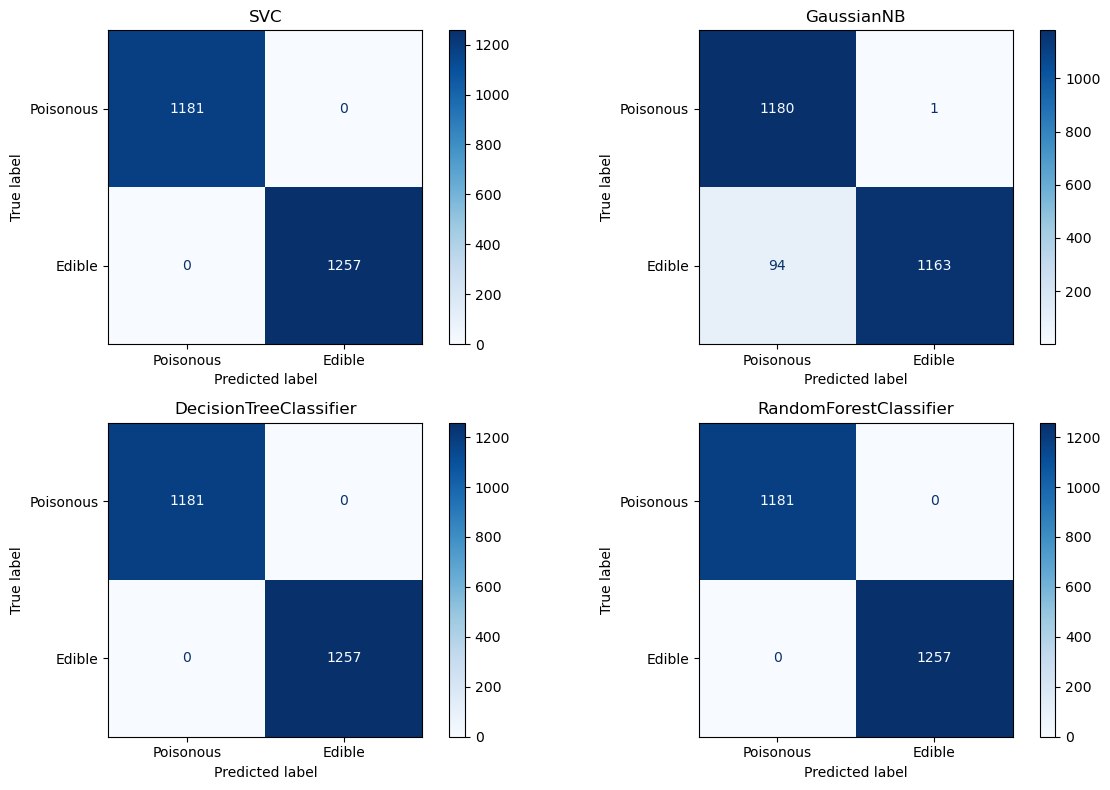

In [33]:
fig2, axes2 = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
for cls, ax in zip(models, axes2.flatten()):
    # plot confusion matrices
    y_pred = cls.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=np.arange(len(['Poisonous', 'Edible'])))
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poisonous', 'Edible'])
    display.plot(ax=ax, cmap='Blues')
    # Set title as the classifier's name
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()

### <center>ROC Curve<center>

Purpose: Visualise the trade-off between recall (true positive rate) and specificity (false positive rate).<br><br>
The models achieved high AUC scores thus they are good measures of separability.

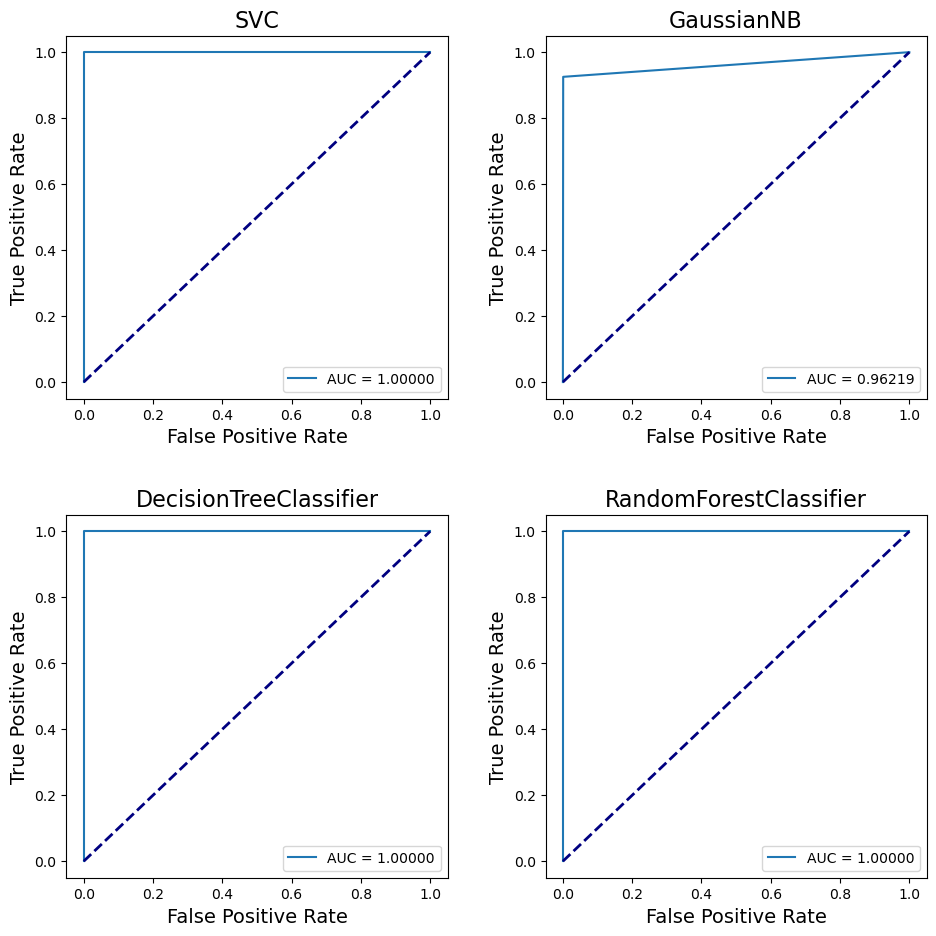

In [34]:
fig3, axes3 = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for cls, ax, y_hat in zip(models, axes3.flatten(), pred):
    # compute roc by passing in the actual and predicted values
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    # compute auc score
    auc = roc_auc_score(y_test, y_hat)
    ax.plot(fpr,tpr,label = f'AUC = {auc:.5f}')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # Set axes labels
    ax.set_xlabel('False Positive Rate', fontsize = 14)
    ax.set_ylabel('True Positive Rate', fontsize = 14)
    # Set legend
    ax.legend(loc="lower right")
    # Set title as the classifier's name
    ax.set_title(type(cls).__name__, fontsize = 16)
plt.tight_layout(pad = 3.0)  
plt.show()

# Model Improvement

## Cross Validation
I created a `cross_validate` function to estimate the model's ability to predict new data. The function calculates the mean of the cross-validation scores for all models. The scores outputted will be compared to the train accuracy score to check whether the model overfitted.

In [27]:
def cross_validate(model):
    # evaluate model
    cv_scores = cross_val_score(model, X, y, cv=cv)
    # return mean of scores
    return np.mean(cv_scores)

# pass models into the cross_validate function
cv_results = [cross_validate(model) for model in models]

# structure the result as a dataframe
cv_df = pd.DataFrame(cv_results, columns = ['Mean CV Score'], index = ['Support Vector', 'Gaussian Naïve Bayes', 
                                                                       'Decision Tree', 'Random Forest'])

# compare the cv score to the train accuracy
cv_df['Train Score'] = accuracy_df['Train Score']
cv_df

,Mean CV Score,Train Score
Support Vector,1.000000,1.000000
Gaussian Naïve Bayes,0.953594,0.962364
Decision Tree,0.999631,1.000000
Random Forest,1.000000,1.000000


According to the dataframe above, there is neither overfitting nor underfitting for all models as the difference between the cross-validation score and train accuracy score is less than 1%.

## Hyperparameter Tuning
I will tune the Support Vector Machine, Decision Tree and Random Forest models. I didn't tune the Gaussian Naive Bayes model because it does not have any hyperparameters for me to tune.<br>
I tried different combinations of hyperparameters and passed them into a grid search.

In [28]:
# SVM
SVC_param_grid = dict(kernel=['rbf', 'sigmoid'],C=[0.01, 0.1, 1.0, 1, 10])
SVC_grid_search = GridSearchCV(estimator=SV, param_grid=SVC_param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
SVC_grid_result = SVC_grid_search.fit(X, y)

print(f'Best Results: {SVC_grid_result.best_score_:.5f} with {SVC_grid_result.best_params_}')

Best Results: 1.00000 with {'C': 1.0, 'kernel': 'rbf'}


In [29]:
# Decision Tree
DT_param_grid = dict(max_depth=np.arange(1, 6), min_samples_leaf=np.arange(1, 6), min_samples_split=np.arange(1, 6))
DT_grid_search = GridSearchCV(estimator=DT, param_grid=DT_param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
DT_grid_result = DT_grid_search.fit(X, y)

print(f'Best Results: {DT_grid_result.best_score_:.5f} with {DT_grid_result.best_params_}')

Best Results: 1.00000 with {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [30]:
# Random Forest
RF_param_grid = dict(max_depth=np.arange(1, 6), min_samples_leaf=np.arange(1, 6), min_samples_split=np.arange(1, 6))
RF_grid_search = GridSearchCV(estimator=RF, param_grid=RF_param_grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
RF_grid_result = RF_grid_search.fit(X, y)

print(f'Best Results: {RF_grid_result.best_score_:.5f} with {RF_grid_result.best_params_}')

Best Results: 0.99040 with {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Manual Fine Tuning
As the results of the Random Forest Algorithm is not as good as the SVM and Decision Tree models, I did manual fine tuning to test if other values of the hyperparameters will generate more accurate scores. Since the chosen max_depth of 5 is the last value of the range of values I passed in, I tried a maximum depth of 7. The cross-validation score improved so I used this value instead.

In [31]:
RF_tuned = RandomForestClassifier(max_depth = 7, min_samples_leaf = 1, min_samples_split = 2)
print(f'CV Accuracy Score: {cross_validate(RF_tuned):.3f}%')

CV Accuracy Score: 1.000%


I passed in the best hyperparameters into both models.

In [32]:
SV_tuned = SVC(C = 50, kernel = 'rbf')
DT_tuned = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 4, min_samples_split = 2)
RF_tuned = RandomForestClassifier(max_depth = 7, min_samples_leaf = 1, min_samples_split = 2)

I passed the tuned models into the `train_model` function again. 

In [33]:
tuned_models = [SV_tuned, DT_tuned, RF_tuned]
tuned_results = [train_model(model) for model in tuned_models]

# store the accuracy scores
tuned_scores = [score[0] for score in tuned_results]

# store the predicted values of the test set
tuned_pred  = [y_hat[1] for y_hat in tuned_results]

# store and present accuracy scores in a dataframe
tunedaccuracy_df = pd.DataFrame(tuned_scores, columns = ['Test Score', 'Train Score'], 
                           index = ['Support Vector', 'Decision Tree', 'Random Forest'])

------SVC------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

------DecisionTreeClassifier------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

------RandomForestClassifier------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1181
           1       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.0

After tuning all models achieved an accuracy score of 1.0 for the test and train set.

In [34]:
tunedaccuracy_df

,Test Score,Train Score
Support Vector,1.0,1.0
Decision Tree,1.0,1.0
Random Forest,1.0,1.0


In [35]:
# pass tuned models into the cross_validate function
tunedcv_results = [cross_validate(model) for model in tuned_models]

# structure the result as a dataframe
tunedcv_df = pd.DataFrame(tunedcv_results, columns = ['Mean CV Score'], index = ['Support Vector', 'Decision Tree', 'Random Forest'])

# compare the cv score to the train accuracy
tunedcv_df['Train Score'] = tunedaccuracy_df['Train Score']
tunedcv_df

,Mean CV Score,Train Score
Support Vector,1.000000,1.0
Decision Tree,1.000000,1.0
Random Forest,0.999877,1.0


The SVM and Decision Tree achieved the optimal mean cross-validation score of 1.0 while the Random Forest's validation score dropped slightly.

# Model Evaluation (After Tuning)

### <center>Confusion Matrix<center>

All tuned models achieved the best recall and precision values.

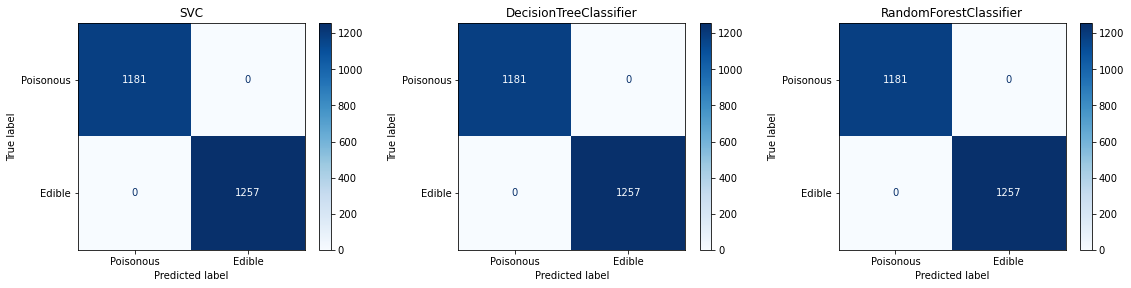

In [36]:
fig4, axes4 = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
for cls, ax in zip(tuned_models, axes4.flatten()):
    # plot confusion matrices
    y_pred = cls.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=np.arange(len(['Poisonous', 'Edible'])))
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poisonous', 'Edible'])
    display.plot(ax=ax, cmap='Blues')
    # Set title as the classifier's name
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()

### <center>ROC Curve<center>

All models achieved the optimal AUC of 1.0, hence the models are good measures of separability.

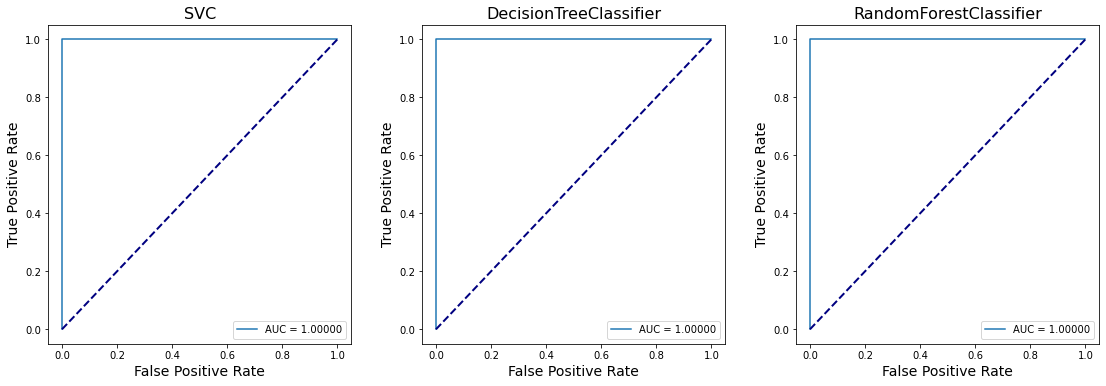

In [37]:
fig5, axes5 = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
for cls, ax, y_hat in zip(tuned_models, axes5.flatten(), tuned_pred):
    # compute roc by passing in the actual and predicted values
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    # compute auc score
    auc = roc_auc_score(y_test, y_hat)
    ax.plot(fpr,tpr,label = f'AUC = {auc:.5f}')
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    # Set axes labels
    ax.set_xlabel('False Positive Rate', fontsize = 14)
    ax.set_ylabel('True Positive Rate', fontsize = 14)
    # Set legend
    ax.legend(loc="lower right")
    # Set title as the classifier's name
    ax.set_title(type(cls).__name__, fontsize = 16)
plt.tight_layout(pad = 3.0)
plt.show()

## <center>Decision Tree Plot<center>

Visual representation of how the Decision Tree classifier makes a decision based on the features.<br><br>
**Legend**<br>
Orange: Predicted to be poisonous<br>
Blue: Predicted to be edible<br>

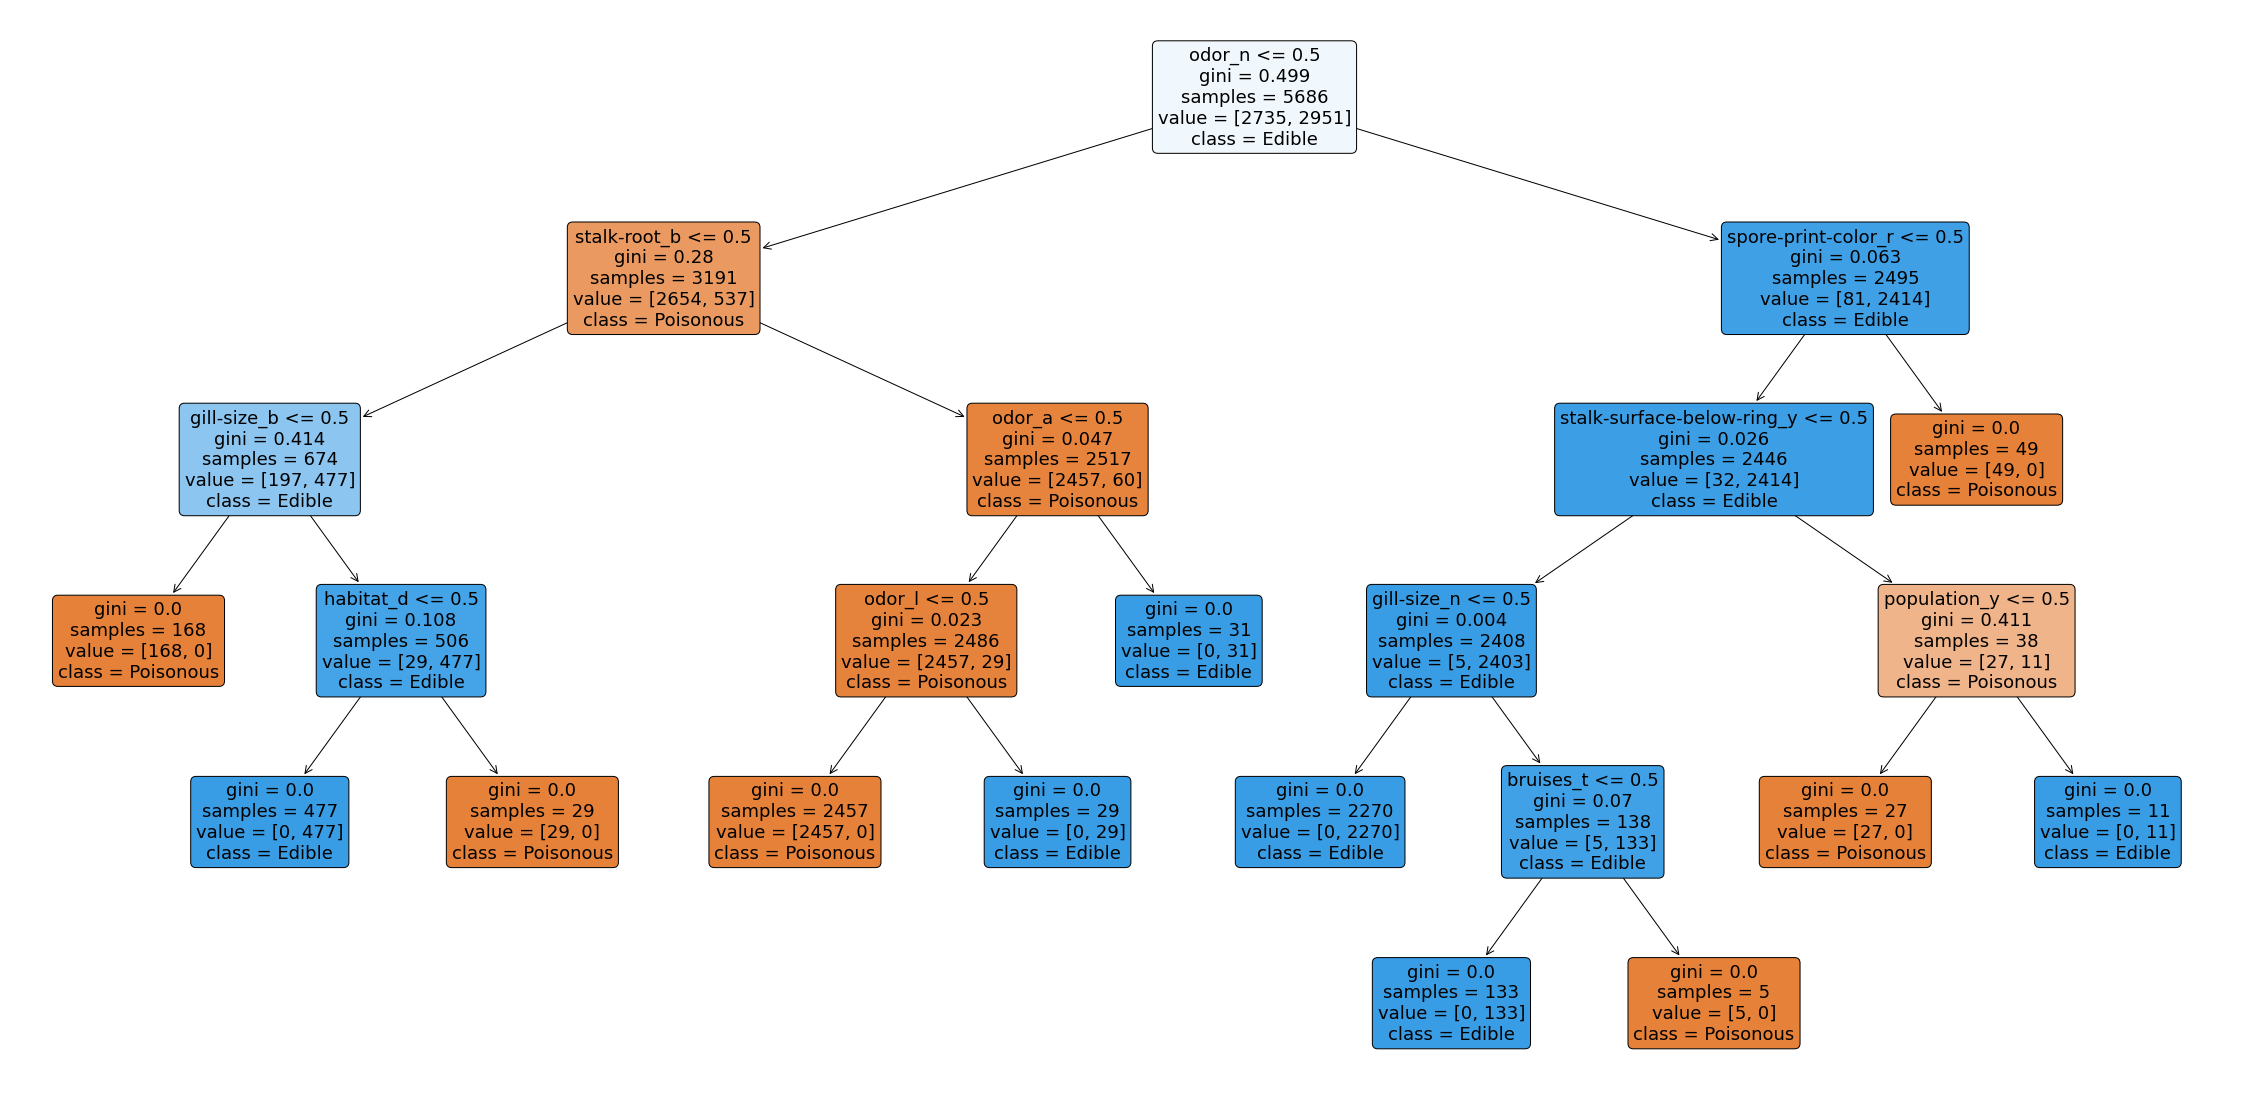

In [38]:
plt.figure(figsize=(40, 20))
plot_tree(DT_tuned, rounded=True, filled=True, fontsize=18, feature_names=X_train.columns.values, 
          class_names=['Poisonous', 'Edible'])
plt.show()

# Feature Importance
Only the Decision Tree and Random Forest algorithms had the `feature_importances_` attribute, hence I analysed which features these 2 models considered important.

Important features according to the Decision Tree Classifier.

In [39]:
DT_features = pd.DataFrame(DT_tuned.feature_importances_, index = X_train.columns.values, columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)
# Ignored features with a feature importance score of 0
DT_has_impt = DT_features[DT_features['Feature Importance'] != 0]
DT_has_impt

,Feature Importance
odor_n,0.630137
stalk-root_b,0.175167
gill-size_b,0.078962
spore-print-color_r,0.032963
odor_a,0.021070
odor_l,0.020192
habitat_d,0.019260
stalk-surface-below-ring_y,0.013228
population_y,0.005506
bruises_t,0.003395


Plotted a barplot to visualise the importance of features in descending order.

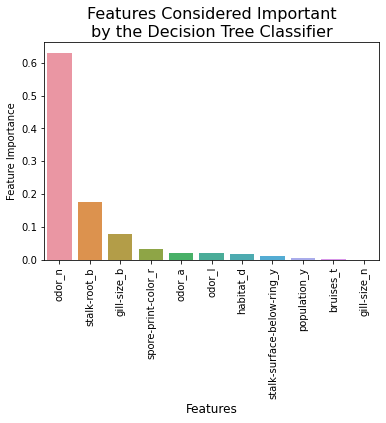

In [40]:
sns.barplot(data = DT_has_impt, x = DT_has_impt.index, y = 'Feature Importance')
plt.xticks(rotation = 90)
plt.xlabel('Features', fontsize = 12)
plt.title('Features Considered Important\nby the Decision Tree Classifier', fontsize = 16)
plt.show()

I have removed the last 2 characters from each characteristic as there are multiple characteristics that belong to the same feature. Through this I summarised which features are important to the model.<br>
The Decision Tree model considers **8 features** important in predicting the class of the mushrooms.

In [41]:
pd.Series(np.unique([feature[:-2] for feature in DT_has_impt.index.values]))

0                     bruises
1                   gill-size
2                     habitat
3                        odor
4                  population
5           spore-print-color
6                  stalk-root
7    stalk-surface-below-ring
dtype: object

Important features according to the Random Forest Classifier.

In [42]:
RF_features = pd.DataFrame(RF_tuned.feature_importances_, index = X_train.columns.values, columns = ['Feature Importance']).sort_values('Feature Importance', ascending = False)
# Ignored features with a feature importance score of 0
RF_has_impt = RF_features[RF_features['Feature Importance'] != 0]
RF_has_impt

,Feature Importance
odor_n,1.553324e-01
odor_f,7.618962e-02
gill-size_b,7.195269e-02
gill-color_b,5.470263e-02
stalk-surface-above-ring_k,4.827207e-02
...,...
cap-surface_g,3.894142e-05
stalk-color-below-ring_e,1.262865e-05
gill-color_e,8.489026e-06
gill-color_y,6.903331e-06


Plotted a barplot to visualise the importance of features in descending order.

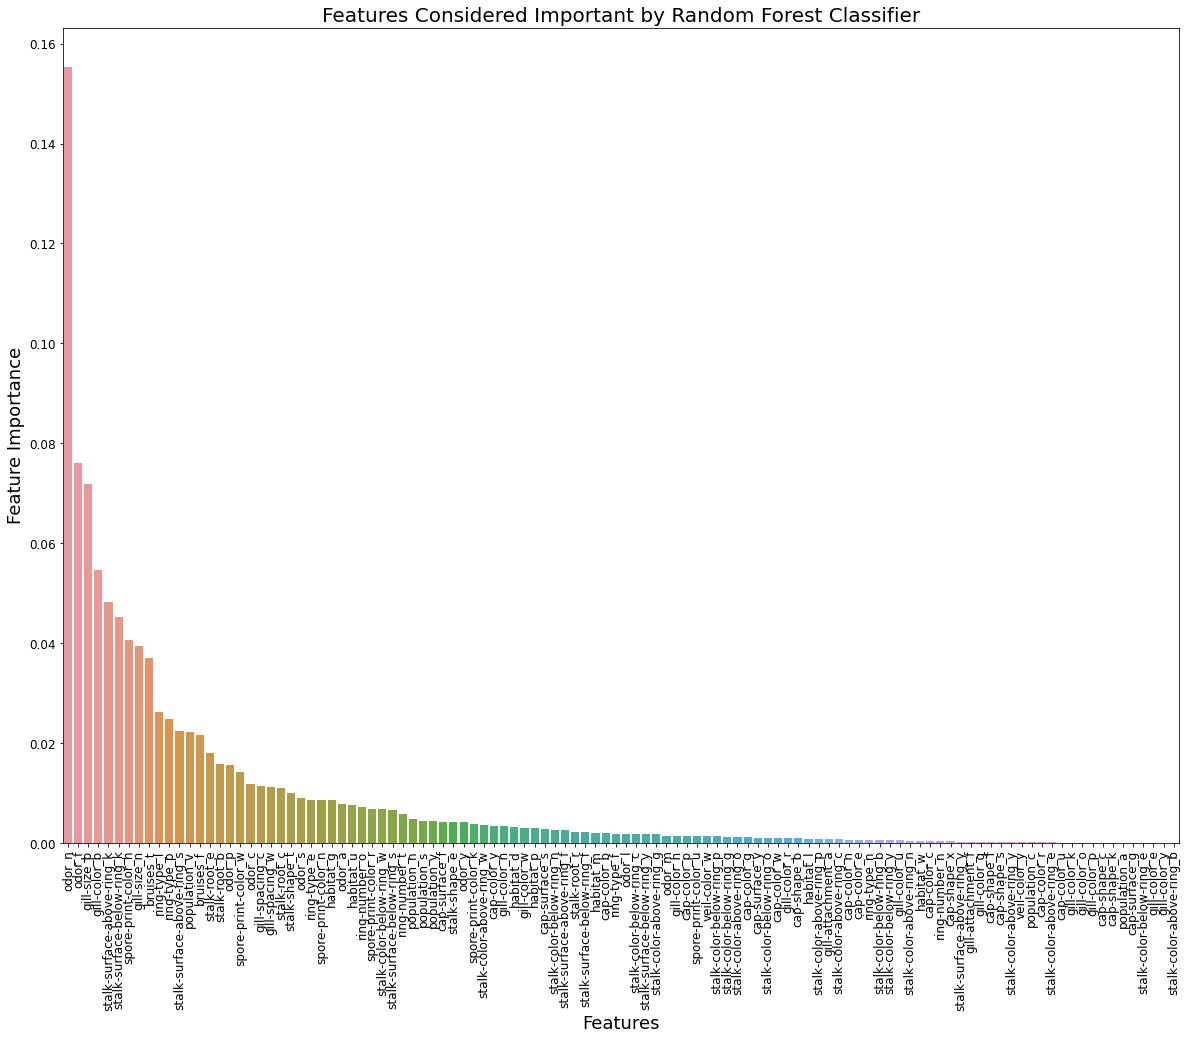

In [43]:
plt.figure(figsize = (20, 15))
sns.barplot(data = RF_has_impt, x = RF_has_impt.index, y = 'Feature Importance')
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel('Features', fontsize = 18)
plt.yticks(fontsize = 12)
plt.ylabel('Feature Importance', fontsize = 18)
plt.title('Features Considered Important by Random Forest Classifier', fontsize = 20)
plt.show()

I have also removed the last 2 characters from each characteristic.<br>
The Random Forest Algorithm considers **21 features** important in predicting the class of the mushrooms.

In [44]:
pd.Series(np.unique([feature[:-2] for feature in RF_has_impt.index.values]))

0                      bruises
1                    cap-color
2                    cap-shape
3                  cap-surface
4              gill-attachment
5                   gill-color
6                    gill-size
7                 gill-spacing
8                      habitat
9                         odor
10                  population
11                 ring-number
12                   ring-type
13           spore-print-color
14      stalk-color-above-ring
15      stalk-color-below-ring
16                  stalk-root
17                 stalk-shape
18    stalk-surface-above-ring
19    stalk-surface-below-ring
20                  veil-color
dtype: object

# Conclusion
- Overall, the four models performed well.
- The Decision Tree model requires less features to achieve similar accuracy in its predictions compared to the Random Forest model. Thus, between the 2 classifiers, the Decision Tree performed better as it is able to identify more irrelevant features.
- According to the Decision Tree, the most important features are `odor`, `stalk-root` and `gill-size`. Thus, focusing on these features would be useful in predicting the class of the mushrooms.
- Throughout model training, cross-validation and hyperparameter tuning, the SVC model achieved optimal accuracy of 1.0. Therefore, it should be used to make predictions for this dataset.